# Importing and Splitting data

### Preparing Train and Test set before any processing to avoid data leakage

In this section, we're importing all the necessary libraries that we'll use throughout this notebook. We're also setting up the environment to display plots inline in the notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# split the data into train and test
from sklearn.model_selection import train_test_split

Here, we're reading in our dataset from an Excel file. This dataset contains all the information we'll be analyzing and modeling.


In [2]:
os.getcwd()

'c:\\Users\\fenan\\OneDrive\\Desktop\\NETHERLANDS\\msc-data-science\\Final Thesis\\AAA-FINAL-THESIS\\src\\data-preparation'

In [3]:
df = pd.read_excel("../../data/survey_results_public3.0.xlsx")

Now, we're displaying the information about our dataframe including the number of entries, columns, and the data type of each column. This will help us understand more about the data that we're dealing with.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In this part of the code, we're selecting the specific columns that we want to use for our analysis and renaming them to be more readable and understandable. 

We also display the first few rows of our dataframe to verify that everything looks as expected.


In [5]:
df = df[["Employment", "RemoteWork", "CodingActivities", "EdLevel", "LearnCodeCoursesCert", "DevType", "OrgSize",
"Country", "Age", "Gender", "Trans", "Sexuality", "Ethnicity", "Accessibility","MentalHealth", "WorkExp", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename(columns={
    "Employment": "Job_type", # full-time, part-time ...
    "RemoteWork": "Remote_work", # hybrid, onsite, remote
    "CodingActivities": "Coding_as_hobby", # yes , no
    "EdLevel": "Education", # bachelors, masters, high school ...
    "LearnCodeCoursesCert": "Certifications", # yes / no
    "DevType": "Job_title", # data scientist, ML engineer, data analyst ...
    "OrgSize": "Company_size", # 'XS', 'S', 'M', 'L', 'XL'
    "Age": "Age", # 18 - 24 years old, 25 - 34 years old ...
    "Gender": "Gender", # male, female, prefer not to say ...
    "Trans": "Trans", # yes / no ---> the yes will be included in gender column, the column then will be deleted for simplicity
    "Sexuality": "Sexual_orientation", # gay or lesbian, straight, prefer not to say, ...
    "Ethnicity": "Ethnicity", # White / European, Indian / South Asian, African, ...
    "Accessibility": "Physical_disability", # no / yes, prefer not to say
    "MentalHealth": "Mental_disability", # No, Various_disabilities, Memory_disorder, Others, Anxiety_disorder ...
    "WorkExp": "Work_experience", # 3, 7, 16, 20, ...
    "YearsCodePro": "Coding_experience", # 'Less than 1 year', '10', '7', '6', '8', '1',
    "ConvertedCompYearly": "Annual_salary"} # 15000, 39600, 266080, 48740 ... in USD $ 
    )
df.sample(10)

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
4006,"Student, full-time",NaN,NaN,Some college/university study without earning ...,Udemy,NaN,NaN,Indonesia,18-24 years old,Man,No,Straight / Heterosexual,Asian,None of the above,None of the above,NaN,NaN,NaN
31265,"Employed, full-time",Full in-person,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",Udemy;Codecademy,"Developer, front-end;Developer, QA or test;Dev...",2 to 9 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,Middle Eastern,None of the above,Prefer not to say,NaN,4,NaN
64189,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack;Cloud infrastructure eng...","1,000 to 4,999 employees",United States of America,25-34 years old,Man,No,Bisexual,White;North American,None of the above,"I have a mood or emotional disorder (e.g., dep...",9.0,9,130000.0
61400,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Other (please specify):,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack","10,000 or more employees",United States of America,25-34 years old,Man,No,Gay or Lesbian;Queer,Asian;Central Asian,None of the above,"I have a mood or emotional disorder (e.g., dep...",8.0,2,145000.0
36504,"Student, full-time",NaN,NaN,Some college/university study without earning ...,Codecademy;Other,NaN,NaN,United States of America,Under 18 years old,"Non-binary, genderqueer, or gender non-conforming",No,Bisexual,White;European;Ethnoreligious group,I am blind / have difficulty seeing,I have a concentration and/or memory disorder ...,NaN,NaN,NaN
56347,"Employed, full-time",Full in-person,Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",Udemy,"Developer, front-end;Developer, full-stack","1,000 to 4,999 employees",Singapore,25-34 years old,Man,No,Straight / Heterosexual,Indian,None of the above,None of the above,10.0,11,70128.0
749,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Freelance/contract work,"Associate degree (A.A., A.S., etc.)",Coursera;Udemy;Codecademy;edX,"Developer, back-end;Developer, desktop or ente...",20 to 99 employees,Spain,35-44 years old,Man,No,Straight / Heterosexual,White;European,None of the above,"I have a mood or emotional disorder (e.g., dep...",22.0,22,44790.0
52306,"Employed, full-time",Fully remote,Hobby;School or academic work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",Udemy;Codecademy;Pluralsight;Udacity,"Developer, full-stack;Student;Blockchain","10,000 or more employees",India,25-34 years old,Man,No,Straight / Heterosexual,Indian,None of the above,None of the above,5.0,5,19346.0
22856,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end",20 to 99 employees,India,25-34 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,9.0,9,28374.0
49094,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Udemy,"Developer, front-end","10,000 or more employees",India,35-44 years old,Man,No,Straight / Heterosexual,Indian,None of the above,None of the above,12.0,8,20636.0


In [6]:
df.shape[0] # 73268 rows to work with

73268

In this section, we're removing any rows from our dataframe where the 'Annual_salary' column is null. We then display the new number of rows in our dataframe to see how many rows were dropped.


In [7]:
df = df[df["Annual_salary"].notnull()]
df.shape[0]

38071

In [8]:
df.Annual_salary.isnull().sum() # no null values anymore!

0

In this section, we're defining a function to create stratified folds in our data, and then using this function to create a new 'fold' column in our dataframe. 

We then split our data into a train set and a test set based on these folds. This way, both splits will have "a bit of everything".




In [9]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

def create_cont_folds(y, n_s=5, n_grp=60, seed=42):
    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)
    grp = pd.qcut(y, n_grp, labels=False, duplicates='drop')
    #print(grp)

    fold_nums = np.zeros(len(y))
    for fold_no, (_, v) in enumerate(skf.split(grp, grp)):
        fold_nums[v] = fold_no

    return fold_nums

# Use the function to create stratified folds
df['fold'] = create_cont_folds(df['Annual_salary'])

# Let's say we want to use the first fold as our test set and the rest as our training set
test_fold = 0

train = df[df['fold'] != test_fold].copy()
test = df[df['fold'] == test_fold].copy()

# Drop the 'fold' column before training your model
train.drop(columns='fold', inplace=True)
test.drop(columns='fold', inplace=True)

We used `StratifiedKFold` to create stratified folds of the `Annual_salary` column, which is our target variable. 

This is a good approach as it ensures that each fold has the same distribution of the target variable, which can result in a more robust model.

In [10]:
# Now let's check the shape of the train and test data
train.shape, test.shape

((30456, 18), (7615, 18))

In [11]:
train.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
2,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,5,40205.0
10,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,2,60307.0
11,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,Engineering manager,20 to 99 employees,United States of America,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",14.0,10,194400.0
12,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",2 to 9 employees,United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,65000.0
14,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.0,5,110000.0


In [12]:
test.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
3,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",100 to 499 employees,Israel,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,NaN,17,215232.0
8,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, back-end",I donâ€™t know,Netherlands,25-34 years old,Woman,No,Prefer to self-describe:,European,"Or, in your own words:","Or, in your own words:",6.0,6,49056.0
17,"Employed, full-time",Fully remote,Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Coursera;Pluralsight,"Engineer, data","1,000 to 4,999 employees",Austria,25-34 years old,Woman,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,10,202623.0
28,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, desktop or enterprise applications;...","10,000 or more employees",United States of America,35-44 years old,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,None of the above,14.0,14,130000.0
51,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end",20 to 99 employees,Poland,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,"I have a mood or emotional disorder (e.g., dep...",3.0,3,38856.0


### Did stratification actually work?

In this part of the code, we're splitting our data into a train set and a test set using a random train-test split. We will use these datasets to compare the effect of stratification on our data.


In [13]:
# Let's split the data into train and test
train_before_stratification, test_before_stratification = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

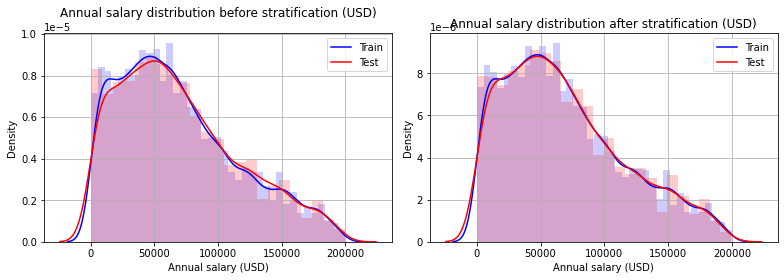

In [14]:
# Plot 1
train_before = train_before_stratification[(train_before_stratification.Annual_salary < 200000) & (train_before_stratification.Annual_salary > train_before_stratification.Annual_salary.min())].Annual_salary
test_before = test_before_stratification[(test_before_stratification.Annual_salary < 200000) & (test_before_stratification.Annual_salary > test_before_stratification.Annual_salary.min())].Annual_salary

# Create subplots and assign axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

sns.kdeplot(train_before, ax=ax1, color='blue', fill=False)
sns.kdeplot(test_before, ax=ax1, color='red', fill=False)
train_before.hist(ax=ax1, bins='scott', alpha=0.2, density=True, color='blue')
test_before.hist(ax=ax1, bins='scott', alpha=0.2, density=True, color='red')
ax1.set_xlabel('Annual salary (USD)')
ax1.set_ylabel('Density')
ax1.set_title('Annual salary distribution before stratification (USD)', y=1.05)
ax1.legend(['Train', 'Test'])  

# Plot 2
train_sal = train[(train.Annual_salary < 200000) & (train.Annual_salary > train.Annual_salary.min())].Annual_salary
test_sal = test[(test.Annual_salary < 200000) & (test.Annual_salary > test.Annual_salary.min())].Annual_salary

sns.kdeplot(train_sal, ax=ax2, color='blue', fill=False)
sns.kdeplot(test_sal, ax=ax2, color='red', fill=False)
train_sal.hist(ax=ax2, bins='scott', alpha=0.2, density=True, color='blue')
test_sal.hist(ax=ax2, bins='scott', alpha=0.2, density=True, color='red')
ax2.set_xlabel('Annual salary (USD)')
ax2.set_ylabel('Density')
ax2.set_title('Annual salary distribution after stratification (USD)')
ax2.legend(['Train', 'Test'])

plt.tight_layout()
plt.savefig("../paper/data-preparation/import-split/stratification-results.pdf")
plt.show()

Finally, we're saving our stratified train and test dataframes to csv files so we can use them in the next steps.


In [15]:
# we will save the train and test data into csv files
train.to_csv("../output/train.csv", index=False)
test.to_csv("../output/test.csv", index=False)

# since it will be also the input for the train/test nbs
train.to_csv("../input/train.csv", index=False)
test.to_csv("../input/test.csv", index=False)

## Summary

Splitting before EDA, data cleaning and feature engineering has some advantages:

- **Prevents Data Leakage:** By splitting the data first, you prevent any potential data leakage between the training and test sets, preserving the integrity of the evaluation process.
- **Real-World Scenario Simulation:** In real-world scenarios, the model will be deployed on unseen data. Training the model this way simulates that environment more closely.